In [1]:
from skimage.transform import radon, iradon
import pydicom as dicom
import numpy as np
import os
from glob import glob
import re
import matplotlib.pyplot as plt

In [2]:
path = "../data/dicom"

In [3]:
high_metal_folder = [
            sorted(
                glob(
                    os.path.join(path, "high_metal/acquisition_" + str(i) + "/*")
                ),
                key=lambda x: [
                    int(c) if c.isdigit() else c for c in re.split(r"(\d+)", x)
                ],
            )
            for i in range(11)
        ]

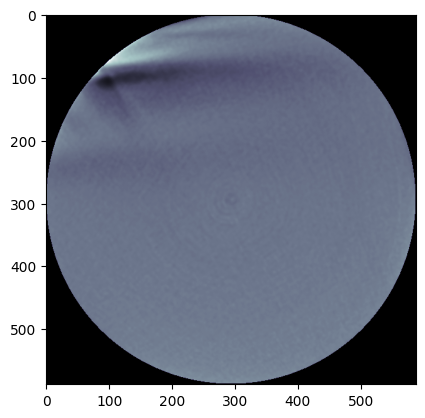

In [4]:
dcm = dicom.dcmread(high_metal_folder[3][65])
y = dcm.pixel_array
plt.imshow(y[:,], cmap= plt.cm.bone)

In [5]:
max_y, min_y = np.max(y), np.min(y)
max_y, min_y

(1997, 0)

In [6]:
y_ = 2*(y - min_y)/(max_y - min_y) - 1

In [8]:
np.max(y_), np.min(y_)

(1.0, -1.0)

In [9]:
y__ = (y_ + 1)/2 * (max_y - min_y) + min_y

In [10]:
np.max(y__), np.min(y__)

(1997.0, 0.0)

In [13]:
dcm.PixelData = y__.tobytes()

/Users/hugo/opt/miniconda3/envs/artefact/lib/python3.9/site-packages/pydicom/pixel_data_handlers/numpy_handler.py:250: UserWarning: The length of the pixel data in the dataset (2765952 bytes) indicates it contains excess padding. 2074464 bytes will be removed from the end of the data
  warnings.warn(msg)


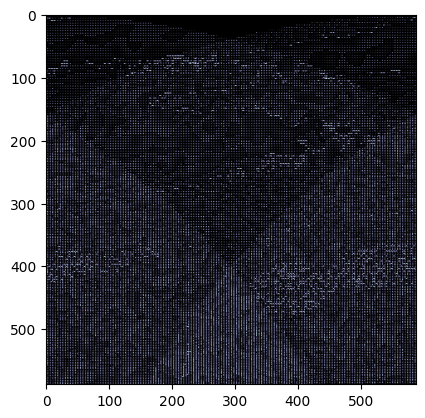

In [14]:
plt.imshow(dcm.pixel_array, cmap= plt.cm.bone)

In [22]:
np.uint8(y__)
plt.imshow(np.uint8(_y), cmap= plt.cm.bone)

NameError: name '_y' is not defined

In [4]:
from collections.abc import Iterable
import pydicom

def show_img(img_path, colormap = None, extra_brightness=0):
    ds = pydicom.dcmread(img_path)
    shape = ds.pixel_array.shape
    target = 255

    # Convert to float to avoid overflow or underflow losses.
    image_2d = ds.pixel_array.astype(float)
    img_data = image_2d
    print(f"data min: {img_data.min()}, max: {img_data.max()}")
    print(f"window center: {ds.WindowCenter}, rescale intercept: {ds.RescaleIntercept}")
    multival = isinstance(ds.WindowCenter, Iterable)
    if multival:
        scale_center = -ds.WindowCenter[0]
    else:
        scale_center = -ds.WindowCenter
    intercept = scale_center+ds.RescaleIntercept+extra_brightness
    print(f"final intercept: {intercept}")
    image_2d += intercept
    print(f"after applying intercept, min: {image_2d.min()}, max: {image_2d.max()}")

    # Rescaling grey scale between 0-255
    image_2d_scaled = (np.maximum(image_2d,0) / image_2d.max()) * 255.0
    print(f"after scaling to 0-255, min: {image_2d_scaled.min()}, max: {image_2d_scaled.max()}")

    # Convert to uint
    image_2d_scaled = np.uint8(image_2d_scaled)

    plt.figure(figsize=(12,8))
    plt.imshow(image_2d_scaled, cmap=colormap)
    plt.show()


data min: 0.0, max: 1157.0
window center: 578, rescale intercept: -1000
final intercept: -1578.0
after applying intercept, min: -1578.0, max: -421.0
after scaling to 0-255, min: -0.0, max: -0.0


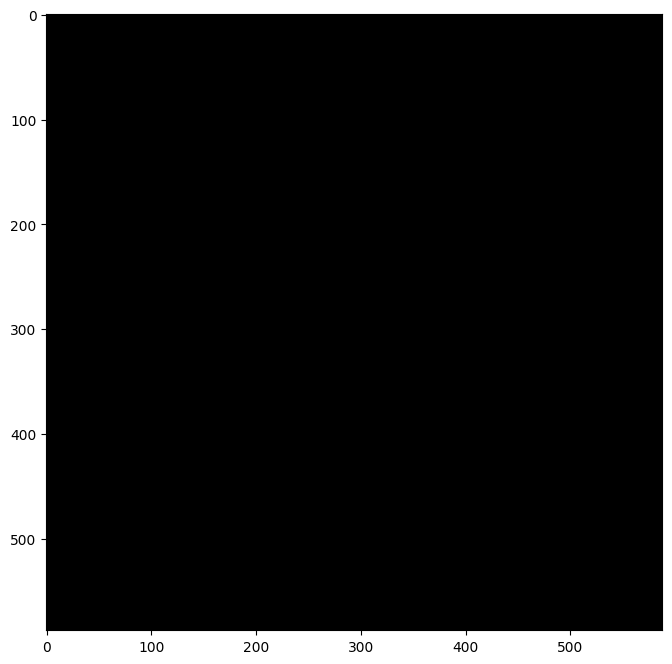

In [9]:
show_img(high_metal_folder[3][15], colormap=plt.cm.bone)